# Importing libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import itertools 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
% matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import gensim
from sklearn.datasets import fetch_20newsgroups
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
import numpy as np
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
np.random.seed(400)
import pyLDAvis.gensim
from textblob import TextBlob, Word
pd.set_option('display.max_rows', 2000)
import datetime as pydt
import warnings
warnings.filterwarnings("ignore")

KeyboardInterrupt: 

# Web scraping

Let's go to 'seek.com' scrape job advertisements related to 'Data Analyst' or 'Data Scientist' in Sydney and Melbourne.

 Info to scrape:
- job title
- company 
- rating 
- date
- city
- suburb
- salary
- work type
- industry
- subindustry
- job description


In [30]:
#scrape all "DATA SCIENTIST" in Sydney advertisements
df_datasci_syd = pd.DataFrame()
data = []
basic_url = 'https://www.seek.com.au/DATA-SCIENTIST-jobs/in-All-Sydney-NSW?page='
for i in range(1, 10):
    website = basic_url + str(i)
    res = requests.get(website)
    soup = BeautifulSoup(res.content, 'lxml')

    for a_tag in soup.find_all('a', {"class":"_2iNL7wI"}):
        url_part_1 = 'https://www.seek.com.au'
        url_part_2 = a_tag.get('href')
        url = str(url_part_1) + str(url_part_2)
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'lxml')
    
        row = {}
        row['Title'] =  soup.find('span', {"class":"_3FrNV7v _12_uzrS E6m4BZb"}).text
        
        if soup.find('span', {"class":"_3FrNV7v _2QG7TNq E6m4BZb"}) is None:
            company = 'NA'
        else:
            company = soup.find('span', {"class":"_3FrNV7v _2QG7TNq E6m4BZb"}).text
        row['Company'] = company
        
        if soup.find('span', {"class":"_1erK2ob"}) is None:
            rating = 'NA'
        else:
            rating = soup.find('span', {"class":"_1erK2ob"}).text
        row['Rating'] = rating
        
        row['Date'] = soup.find_all('span', {"class":"lwHBT6d"})[1].text
        row['Location'] = soup.find_all('strong', {"class":"lwHBT6d"})[1].text
        row['Sublocation'] = soup.find('span', {"class":"eBOHjGN"}).text
        row['Salary'] = soup.find_all('span', {"class":"lwHBT6d"})[2].text
        row['Work type'] = soup.find_all('span', {"class":"lwHBT6d"})[-1].text
        row['Industry'] = soup.find_all('strong', {"class":"lwHBT6d"})[-1].text
        row['Subindustry'] = soup.find_all('span', {"class":"eBOHjGN"})[1].text
        row['Description'] = soup.find('div', {"data-automation":"mobileTemplate"}).text
        data.append(row)
    

df_datasci_syd = pd.DataFrame(data)

In [34]:
#scrape all "DATA ANALYST" in Sydney advertisements
df_data_anal_syd = pd.DataFrame()
data = []
basic_url = 'https://www.seek.com.au/DATA-ANALYST-jobs/in-All-Sydney-NSW?page='
for i in range(1, 201):
    website = basic_url + str(i)
    res = requests.get(website)
    soup = BeautifulSoup(res.content, 'lxml')

    for a_tag in soup.find_all('a', {"class":"_2iNL7wI"}):
        url_part_1 = 'https://www.seek.com.au'
        url_part_2 = a_tag.get('href')
        url = str(url_part_1) + str(url_part_2)
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'lxml')
    
        row = {}
        row['Title'] =  soup.find('span', {"class":"_3FrNV7v _12_uzrS E6m4BZb"}).text
        
        if soup.find('span', {"class":"_3FrNV7v _2QG7TNq E6m4BZb"}) is None:
            company = 'NA'
        else:
            company = soup.find('span', {"class":"_3FrNV7v _2QG7TNq E6m4BZb"}).text
        row['Company'] = company
        
        if soup.find('span', {"class":"_1erK2ob"}) is None:
            rating = 'NA'
        else:
            rating = soup.find('span', {"class":"_1erK2ob"}).text
        row['Rating'] = rating
        
        row['Date'] = soup.find_all('span', {"class":"lwHBT6d"})[1].text
        row['Location'] = soup.find_all('strong', {"class":"lwHBT6d"})[1].text
        row['Sublocation'] = soup.find('span', {"class":"eBOHjGN"}).text
        row['Salary'] = soup.find_all('span', {"class":"lwHBT6d"})[2].text
        row['Work type'] = soup.find_all('span', {"class":"lwHBT6d"})[-1].text
        row['Industry'] = soup.find_all('strong', {"class":"lwHBT6d"})[-1].text
        row['Subindustry'] = soup.find_all('span', {"class":"eBOHjGN"})[1].text
        row['Description'] = soup.find('div', {"data-automation":"mobileTemplate"}).text
        data.append(row)
    

df_data_anal_syd = pd.DataFrame(data)

In [37]:
#scrape all "DATA SCIENTIST" in Melbourne advertisements
df_datasci_mel = pd.DataFrame()
data = []
basic_url = 'https://www.seek.com.au/DATA-SCIENTIST-jobs/in-All-Melbourne-VIC?page='
for i in range(1, 6):
    website = basic_url + str(i)
    res = requests.get(website)
    soup = BeautifulSoup(res.content, 'lxml')

    for a_tag in soup.find_all('a', {"class":"_2iNL7wI"}):
        url_part_1 = 'https://www.seek.com.au'
        url_part_2 = a_tag.get('href')
        url = str(url_part_1) + str(url_part_2)
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'lxml')
    
        row = {}
        row['Title'] =  soup.find('span', {"class":"_3FrNV7v _12_uzrS E6m4BZb"}).text
        
        if soup.find('span', {"class":"_3FrNV7v _2QG7TNq E6m4BZb"}) is None:
            company = 'NA'
        else:
            company = soup.find('span', {"class":"_3FrNV7v _2QG7TNq E6m4BZb"}).text
        row['Company'] = company
        
        if soup.find('span', {"class":"_1erK2ob"}) is None:
            rating = 'NA'
        else:
            rating = soup.find('span', {"class":"_1erK2ob"}).text
        row['Rating'] = rating
        
        row['Date'] = soup.find_all('span', {"class":"lwHBT6d"})[1].text
        row['Location'] = soup.find_all('strong', {"class":"lwHBT6d"})[1].text
        row['Sublocation'] = soup.find('span', {"class":"eBOHjGN"}).text
        row['Salary'] = soup.find_all('span', {"class":"lwHBT6d"})[2].text
        row['Work type'] = soup.find_all('span', {"class":"lwHBT6d"})[-1].text
        row['Industry'] = soup.find_all('strong', {"class":"lwHBT6d"})[-1].text
        row['Subindustry'] = soup.find_all('span', {"class":"eBOHjGN"})[1].text
        row['Description'] = soup.find('div', {"data-automation":"mobileTemplate"}).text
        data.append(row)
    

df_datasci_mel = pd.DataFrame(data)

In [51]:
#scrape all "DATA ANALYST" in Melbourne advertisements
df_data_anal_mel = pd.DataFrame()
data = []
basic_url = 'https://www.seek.com.au/DATA-ANALYST-jobs/in-All-Melbourne-VIC?page='
for i in range(1, 168):
    website = basic_url + str(i)
    res = requests.get(website)
    soup = BeautifulSoup(res.content, 'lxml')

    for a_tag in soup.find_all('a', {"class":"_2iNL7wI"}):
        url_part_1 = 'https://www.seek.com.au'
        url_part_2 = a_tag.get('href')
        url = str(url_part_1) + str(url_part_2)
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'lxml')
    
        row = {}
        
        if soup.find('span', {"class":"_3FrNV7v _12_uzrS E6m4BZb"}) is None:
            title = 'NA'
        else:
            title = soup.find('span', {"class":"_3FrNV7v _12_uzrS E6m4BZb"}).text
        row['Title'] =  title
        
        
        if soup.find('span', {"class":"_3FrNV7v _2QG7TNq E6m4BZb"}) is None:
            company = 'NA'
        else:
            company = soup.find('span', {"class":"_3FrNV7v _2QG7TNq E6m4BZb"}).text
        row['Company'] = company
        
        
        if soup.find('span', {"class":"_1erK2ob"}) is None:
            rating = 'NA'
        else:
            rating = soup.find('span', {"class":"_1erK2ob"}).text
        row['Rating'] = rating    
        
        
        if soup.find_all('strong', {"class":"lwHBT6d"}) is None:
            date = 'NA'
        else:
            date = soup.find_all('span', {"class":"lwHBT6d"})[1].text
        row['Date'] = date
        
        
        row['Location'] = soup.find_all('strong', {"class":"lwHBT6d"})[1].text
        row['Sublocation'] = soup.find('span', {"class":"eBOHjGN"}).text
        row['Salary'] = soup.find_all('span', {"class":"lwHBT6d"})[2].text
        row['Work type'] = soup.find_all('span', {"class":"lwHBT6d"})[-1].text
        row['Industry'] = soup.find_all('strong', {"class":"lwHBT6d"})[-1].text
        row['Subindustry'] = soup.find_all('span', {"class":"eBOHjGN"})[1].text
        row['Description'] = soup.find('div', {"data-automation":"mobileTemplate"}).text
        data.append(row)
    

df_data_anal_mel = pd.DataFrame(data)

In [1723]:
# add a column for the search term
df_datasci_syd['Search term'] = 'Data Scientist'
df_data_anal_syd['Search term'] = 'Data Analyst'
df_datasci_mel['Search term'] = 'Data Scientist'
df_data_anal_mel['Search term'] = 'Data Analyst'

In [1730]:
# investigate shapes of scraped info:
print('Data science in Sydney: ',df_datasci_syd.shape)
print('Data analysis in Sydney: ',df_data_anal_syd.shape)
print('Data science in Melbourne: ',df_datasci_mel.shape)
print('Data analysis in Melbourne: ',df_data_anal_mel.shape)

Data science in Sydney:  (180, 12)
Data analysis in Sydney:  (4004, 12)
Data science in Melbourne:  (103, 12)
Data analysis in Melbourne:  (3210, 12)


In [1989]:
# concatenate dataframes
df = pd.concat([df_data_anal_syd, df_datasci_syd, df_data_anal_mel, df_datasci_mel])

In [1997]:
# drop duplicate rows
df.drop_duplicates(subset =['Company', 'Description', 'Location', 'Salary', 'Sublocation', 'Title', 'Work type'], 
                   inplace=True) 

In [1998]:
df.shape

(5254, 12)

2243 duplicates were dropped!

In [1990]:
# reset index
df.reset_index(drop=True, inplace=True)

# Cleaning

In [10]:
# let's just focus on the interesting columns
df = pd.read_csv('scraped_ads.csv')[['Location', 'Title', 'Work type', 'Industry', 'Salary']]

# take a peek at the dataframe
df.head()

,Location,Title,Work type,Industry,Salary
0,Sydney,Data Analyst (Digital),Contract/Temp,Information & Communication Technology,"$60,000 - $70,000 plus Super"
1,Sydney,Junior Data and Reporting Analyst,Full Time,Information & Communication Technology,$60k - $66k p.a.
2,Sydney,CRM Data Analyst,Contract/Temp,Information & Communication Technology,NaN
3,Sydney,Junior Data Analyst,Full Time,Real Estate & Property,NaN
4,Sydney,Data Analyst,Contract/Temp,Information & Communication Technology,$550 - $600.00 per day


## Cleaning 'Salary'

The salary column is very messy!! Some values are non-numerical, some values are ambiguous, some values contain a range, etc!

Plan of attack:
1. Isolate numerical salary info (i.e. reject ambiguous salary info like "competitive package")
2. Classify salary info as 'yearly', 'weekly, 'daily' or 'hourly.
3. Extract average salary from 'yearly' pay info
4. Extract average salary from 'weekly' pay info
5. Extract average salary from 'daily' pay info
6. Extract average salary from 'hourly' pay info
7. Combine all of this information into a 'clean salary' column


Let's go!

### Isolating numerical salary info

In [1884]:
# create a new salary column from which we'll work on
df['Salary_2'] = df['Salary']

In [1885]:
# create a function that keeps numerical info and converts non-numerical info into 'NA'
def keep_numerical(salary_info):
    if salary_info == 'Lucrative Perm Role. ASX top 50 Client. Sydney CBD':
        return 'NA'
    elif salary_info == 'Please call Adrian Zanatta at u&u on 02 8245 7913':
        return 'NA'
    elif salary_info == 'Call Brittney Nielsen on 9270 2617':
        return 'NA'
    elif salary_info == 'Pro rata (0.5 FTE)':
        return 'NA'
    elif salary_info == 'Contact Sherri Hodson on 0402 618 969':
        return 'NA'
    elif salary_info == 'Attractive Salary + 10% Superannuation ':
        return 'NA'
    elif salary_info == 'Up to $0.00 p.a':
        return 'NA'
    elif salary_info == 'Generous base salary + 20% bonus':
        return 'NA'
    elif salary_info == '0':
        return 'NA'
    elif salary_info == 'Up to $0.00 p.a.':
        return 'NA'
    elif salary_info == 'Attractive Salary + 10% Superannuation':
        return 'NA'
    elif salary_info == 'Up to 10% discounts across the Group. ':
        return 'NA'
    elif salary_info == 'BASE + INCENTIVE TO 80% + SHARES + TRAVEL':
        return 'NA'
    elif (str(0) or str(1) or str(2) or str(3) or str(4) or str(5) or str(6) or str(7) or str(8) or str(9)) in salary_info:
        return salary_info
    else:
        return 'NA'
    
# note to self: this code could be improved by using regular expressions


In [1886]:
# apply this function to 'Salary_2'
df['Salary_2'] = df['Salary_2'].apply(keep_numerical)

### Classifying salary frequency

In [1888]:
# create a function that determines if pay info is given on an hourly, daily, weekly, or yearly basis
def pay_info(salary_info):
    if salary_info == 'NA':
        return 'NA'

    if 'per day' in salary_info.lower():
        return 'daily'
    if 'p.d.' in salary_info.lower():
        return 'daily'
    if 'pd' in salary_info.lower():
        return 'daily'
    if 'day' in salary_info.lower():
        return 'daily'
    if 'p/d' in salary_info.lower():
        return 'daily'
    if 'daily' in salary_info.lower():
        return 'daily'
    if '700− 1k p.d. + competitive' in salary_info.lower():
        return 'daily'  
    if salary_info == '$700 - $1000 per day':
        return 'daily'   

    
    if 'p.w.' in salary_info.lower():
        return 'weekly'
    
    
    if '0k' in salary_info.lower():
        return 'yearly'
    if '000' in salary_info:
        return 'yearly'
    if 'pa' in salary_info.lower():
        return 'yearly'
    if 'p.a.' in salary_info.lower():
        return 'yearly'
    if 'annum' in salary_info.lower():
        return 'yearly'
    if bool(re.search('[0-9]{2}[-][0-9]{2}[\s][+][\s]', salary_info)):
        return 'yearly'    
    if salary_info == '$50 - $75 + SUPER':
        return 'yearly'


    if 'p.h.' in salary_info.lower():
        return 'hourly'
    if 'hour' in salary_info.lower():
        return 'hourly'
    if '0ph ' in salary_info.lower():
        return 'hourly'
    if ' ph ' in salary_info.lower():
        return 'hourly'
    if 'p/h' in salary_info.lower():
        return 'hourly'
    if '/hr' in salary_info.lower():
        return 'hourly'
    if ' ph' in salary_info.lower():
        return 'hourly'
  
    else:
        return 'daily'



In [1889]:
# apply this function to salary
df['Pay Info'] = df['Salary_2'].apply(pay_info)

### Extracting average salary from 'yearly' pay info

In [1891]:
# create a column for pay information that is given on a yearly basis
df['yearly rate'] = np.where(df['Pay Info'] == 'yearly', df['Salary'], '0')

In [1892]:
# create a function to extract the minimum salary
def yearly_rate_min(rate):
    if '-' in rate:
        minimum = re.sub("[^0-9]", "", rate.split('-')[0])
    else:
        minimum = re.sub("[^0-9]", "", rate)
    return minimum

In [1893]:
# create a function to extract the maximum salary
def yearly_rate_max(rate):
    if rate == 'Up to $65,000 + Super - negotiable':
        maximum = '65000'    
    elif '-' in rate:
        maximum = re.sub("[^0-9]", "", rate.split('-')[1])
    else:
        maximum = re.sub("[^0-9]", "", rate)
    return maximum

In [1894]:
# apply the above formulas to create a salary max and min column, converting to float to enable calculations later on
df['yearly min'] = df['yearly rate'].apply(yearly_rate_min)
df['yearly min'] = df['yearly min'].astype(float)

df['yearly max'] = df['yearly rate'].apply(yearly_rate_max)
df['yearly max'] = df['yearly max'].astype(float)

In [1896]:
# create a function that corrects the number of zeroes given in the salary
def correct_zeroes(salary_info):
    if salary_info < 400:
        salary = salary_info * 1000      
    elif salary_info > 1000000:
        salary = salary_info / 100
    else:
        salary = salary_info
    return salary

In [1897]:
# correct the salar columns using this function
df['yearly min'] = df['yearly min'].apply(correct_zeroes)
df['yearly max'] = df['yearly max'].apply(correct_zeroes)

#now, create a column for average salary
df['yearly average'] = (df['yearly max'] + df['yearly min']) /2

Much better! Now salary information in row 2 is correct.


However, some of the more complex salary strings slipped through the cracks of our function! All we can do is correct this manually :(

In [1899]:
# by scrolling through the dataframe, I made the following corrections. 
df.loc[2241, 'yearly average'] = 500000
df.loc[5013, 'yearly average'] = 70000
df.loc[4265, 'yearly average'] = 67500
df.loc[1412, 'yearly average'] = 80000
df.loc[843, 'yearly average'] = 120000
df.loc[4265, 'yearly average'] = 67500
df.loc[2045, 'yearly average'] = 25.5
df.loc[3507, 'yearly average'] = 52500
df.loc[159, 'yearly average'] = 600
df.loc[2045, 'yearly average'] = 25.5
df.loc[4321, 'yearly average'] = 90000
df.loc[2944, 'yearly average'] = 100000
df.loc[3459, 'yearly average'] = 77500
df.loc[2673, 'yearly average'] = 95000
df.loc[2961, 'yearly average'] = 116000
df.loc[2960, 'yearly average'] = 110000
df.loc[1586, 'yearly average'] = 93000
df.loc[2258, 'yearly average'] = 105000
df.loc[3461, 'yearly average'] = 105000
df.loc[2144, 'yearly average'] = 110500
df.loc[4059, 'yearly average'] = 130000
df.loc[1122, 'yearly average'] = 120000
df.loc[4406, 'yearly average'] = 350
df.loc[2038, 'yearly average'] = 210000
df.loc[5169, 'yearly average'] = 67500
df.loc[5143, 'yearly average'] = 67500
df.loc[1700, 'yearly average'] = 72446
df.loc[2112, 'yearly average'] = 85000
df.loc[4044, 'yearly average'] = 80000
df.loc[1268, 'yearly average'] = 72500
df.loc[475, 'yearly average'] = 75000
df.loc[4674, 'yearly average'] = 85000
df.loc[3925, 'yearly average'] = 85000
df.loc[983, 'yearly average'] = 85000
df.loc[1135, 'yearly average'] = 90000
df.loc[1135, 'yearly average'] = 90000

### Extracting average salary from 'weekly' pay info

In [1901]:
# create a column for pay information that is given on a weekly basis
df['weekly rate'] = np.where(df['Pay Info'] == 'weekly', df['Salary'], '0')

Luckily, there are only 4 entries that give pay information on a per week basis. 

In [1907]:
# Let's manually convert this to average salary, by finding the average weekly pay and then 
# multiplying by 48 (average number of work weeks in a year)
df['weekly to yearly'] = 0
df.loc[494, 'weekly to yearly'] = 26160
df.loc[861, 'weekly to yearly'] = 38400
df.loc[934, 'weekly to yearly'] = 36000
df.loc[1748, 'weekly to yearly'] = 38400

### Extracting average salary from 'daily' pay info

In [1914]:
# create a column for pay information that is given on a daily basis
df['daily rate'] = np.where(df['Pay Info'] == 'daily', df['Salary'], '0')

In [1915]:
#create functions that extract the minimum and maximum pay
def daily_rate_min(rate):
    if '-' in rate:
        minimum = re.sub("[^0-9]", "", rate.split('-')[0])
    else:
        minimum = re.sub("[^0-9]", "", rate)
    return minimum

def daily_rate_max(rate):   
    if '-' in rate:
        maximum = re.sub("[^0-9]", "", rate.split('-')[1])
    else:
        maximum = re.sub("[^0-9]", "", rate)
    return maximum

In [1916]:
# apply the above formulas to create max and min columns
df['daily rate min'] = df['daily rate'].apply(daily_rate_min)
df['daily rate max'] = df['daily rate'].apply(daily_rate_max)

In [1918]:
# the function didn't work for the following rows, so we'll have to manually code
df.loc[1697, 'daily rate max'] = 800
df.loc[862, 'daily rate min'] = 750

In [1919]:
#convert columns to float to enable calculations later on
df['daily rate min'] = df['daily rate min'].astype(float)
df['daily rate max'] = df['daily rate max'].astype(float)

In [1921]:
# Some of the values were extracted incorrectly, as can be seen in later rows of the dataframe. 
# Let's correct the amount of zeroes using a function
def correct_zeroes_daily(daily_info):
    if daily_info > 2000:
        daily_info = daily_info / 100     
    else:
        daily_info = daily_info
    return daily_info

In [1922]:
# apply corrections
df['daily rate min'] = df['daily rate min'].apply(correct_zeroes_daily)
df['daily rate max'] = df['daily rate max'].apply(correct_zeroes_daily)

In [1923]:
# create a column for average daily pay, converting to float for calculations later on
df['daily rate average'] = (df['daily rate min'] + df['daily rate max'])/2
df['daily rate average'] = df['daily rate average'].astype(float)

In [1924]:
# the function didn't work for some of the entries, so we'll need to manual code again:
df.loc[524, 'daily rate average'] = 600
df.loc[590, 'daily rate average'] = 650
df.loc[4103, 'daily rate average'] = 850
df.loc[82, 'daily rate average'] = 850
df.loc[3671, 'daily rate average'] = 900
df.loc[1095, 'daily rate average'] = 950
df.loc[1881, 'daily rate average'] = 1050
df.loc[29, 'daily rate average'] = 325
df.loc[3418, 'daily rate average'] = 450
df.loc[747, 'daily rate average'] = 775
df.loc[3170, 'daily rate average'] = 675
df.loc[29, 'daily rate average'] = 325

In [1925]:
# convert average daily pay to average yearly pay, by multiplying by 240 (5 days * 48 months)
df['daily to salary'] = df['daily rate average'] * 240

### Extracting average salary from 'hourly' pay info

In [1928]:
# create a column for pay information that is given on an hourly basis
df['hourly rate'] = np.where(df['Pay Info'] == 'hourly', df['Salary'], '0')

In [1931]:
#create functions that extract the minimum and maximum pay
def hourly_rate_min(rate):
    if '-' in rate:
        minimum = re.sub("[^0-9]", "", rate.split('-')[0])
    else:
        minimum = re.sub("[^0-9]", "", rate)
    return minimum

def hourly_rate_max(rate):   
    if '-' in rate:
        maximum = re.sub("[^0-9]", "", rate.split('-')[1])
    else:
        maximum = re.sub("[^0-9]", "", rate)
    return maximum

In [1932]:
# apply the above formulas to create max and min columns, converting to float for calculations later on
df['hourly rate max'] = df['hourly rate'].apply(hourly_rate_max)
df['hourly rate min'] = df['hourly rate'].apply(hourly_rate_min)

df['hourly rate min'] = df['hourly rate min'].astype(float)
df['hourly rate max'] = df['hourly rate max'].astype(float)

In [1934]:
# Some of the values were extracted incorrectly, as can be seen in later rows of the dataframe. 
# Let's correct the amount of zeroes using a function
def correct_zeroes_hourly(daily_info):
    if daily_info > 1000:
        daily_info = daily_info / 100     
    else:
        daily_info = daily_info
    return daily_info

In [1935]:
# apply corrections
df['hourly rate min'] = df['hourly rate min'].apply(correct_zeroes_hourly)
df['hourly rate max'] = df['hourly rate max'].apply(correct_zeroes_hourly)

# create a column for average hourly pay
df['hourly rate average'] = (df['hourly rate min'] + df['hourly rate max'])/2
df['hourly rate average'] = df['hourly rate average'].astype(int)

In [1937]:
# the function didn't work for the following row, so we'll have to manually code
df.loc[3363, 'hourly rate average'] = 75

In [1940]:
# create a column for average hourly pay, converting to float for calculations later on
df['hourly to salary'] = df['hourly rate average'] * 8 * 5 * 48
df['hourly to salary'] = df['hourly to salary'].astype(int)

### Combining clean salary info

In [1941]:
df['clean salary'] = df['yearly average'] + df['weekly to yearly'] + df['daily to salary'] + df['hourly to salary']
df['clean salary'] = df['clean salary'] .astype(int)

There are still some miscalculations after using our functions and cleaning. Let's do a final manual code clean up!

In [1943]:
df.loc[1862, 'clean salary'] = 100800
df.loc[1862, 'Pay period'] = 'hourly'
df.loc[159, 'clean salary'] = 144000
df.loc[159, 'Pay period'] = 'daily'
df.loc[1205, 'clean salary'] = 108000
df.loc[1205, 'Pay period'] = 'daily'
df.loc[4406, 'clean salary'] = 84000 
df.loc[4406, 'Pay period'] = 'daily'
df.loc[2560, 'clean salary'] = 204000
df.loc[2560, 'Pay period'] = 'daily'
df.loc[1332, 'clean salary'] = 198600
df.loc[1332, 'Pay period'] = 'daily'
df.loc[2492, 'clean salary'] = 198000
df.loc[2492, 'Pay period'] = 'daily'
df.loc[3528, 'clean salary'] = 168000
df.loc[3528, 'Pay period'] = 'daily'
df.loc[632, 'clean salary'] = 168000
df.loc[632, 'Pay period'] = 'daily'
df.loc[478, 'clean salary'] = 240000
df.loc[478, 'Pay period'] = 'daily'
df.loc[4404, 'clean salary'] = 204000
df.loc[2377, 'clean salary'] = 62500
df.loc[2377, 'Pay period'] = 'yearly'
df.loc[2303, 'clean salary'] = 62500
df.loc[2303, 'Pay period'] = 'yearly'
df.loc[1061, 'clean salary'] = 52500
df.loc[1061, 'Pay period'] = 'yearly'
df.loc[691, 'clean salary'] = 114000
df.loc[691, 'Pay period'] = 'yearly'
df.loc[470, 'clean salary'] = 105000
df.loc[470, 'Pay period'] = 'yearly'
df.loc[2675, 'clean salary'] = 100000
df.loc[2675, 'Pay period'] = 'yearly'
df.loc[532, 'clean salary'] = 100000
df.loc[532, 'Pay period'] = 'yearly'
df.loc[2561, 'clean salary'] = 118728.50
df.loc[2561, 'Pay period'] = 'yearly'
df.loc[4028, 'clean salary'] = 87116.50
df.loc[4028, 'Pay period'] = 'yearly'
df.loc[631, 'clean salary'] = 142040.50
df.loc[3868, 'clean salary'] = 117250.50
df.loc[5245, 'clean salary'] = 117250.50
df.loc[3035, 'clean salary'] = 88270
df.loc[35, 'clean salary'] = 88270
df.loc[709, 'clean salary'] = 97162
df.loc[1272, 'clean salary'] = 96960
df.loc[5253, 'clean salary'] = 96808
df.loc[4905, 'clean salary'] = 68506
df.loc[1980, 'clean salary'] = 114508
df.loc[1461, 'clean salary'] = 97441
df.loc[831, 'clean salary'] = 88174.50
df.loc[2997, 'clean salary'] = 76777.50
df.loc[3363, 'clean salary'] = 144000
df.loc[3670, 'Pay period'] = 'yearly'
df.loc[3670, 'clean salary'] = 91918.50
df.loc[2912, 'Pay period'] = 'yearly'
df.loc[2912, 'clean salary'] = 83319.50
df.loc[1980, 'Pay period'] = 'yearly'
df.loc[1461, 'Pay period'] = 'yearly'
df.loc[709, 'Pay period'] = 'yearly'
df.loc[5253, 'Pay period'] = 'yearly'
df.loc[35, 'Pay period'] = 'yearly'
df.loc[3035, 'Pay period'] = 'yearly'
df.loc[831, 'Pay period'] = 'yearly'
df.loc[2997, 'Pay period'] = 'yearly'
df.loc[456, 'Pay period'] = 'yearly'
df.loc[456, 'clean salary'] = 165000
df.loc[932, 'Pay period'] = 'yearly'
df.loc[932, 'clean salary'] = 165000
df.loc[3633, 'Pay period'] = 'yearly'
df.loc[3633, 'clean salary'] = 90000
df.loc[1352, 'Pay period'] = 'daily'
df.loc[1352, 'clean salary'] = 180000
df.loc[1427, 'Pay period'] = 'yearly'
df.loc[1427, 'clean salary'] = 85000
df.loc[3563, 'Pay period'] = 'yearly'
df.loc[3563, 'clean salary'] = 197117.50
df.loc[3370, 'Pay period'] = 'daily'
df.loc[3370, 'clean salary'] = 13200
df.loc[3375, 'Pay period'] = 'hourly'
df.loc[3375, 'clean salary'] = 115200
df.loc[3382, 'Pay period'] = 'yearly'
df.loc[3382, 'clean salary'] = 90000
df.loc[1542, 'Pay period'] = 'hourly'
df.loc[1542, 'clean salary'] = 98880
df.loc[3613, 'Pay period'] = 'yearly'
df.loc[3613, 'clean salary'] = 115000
df.loc[3409, 'Pay period'] = 'yearly'
df.loc[3409, 'clean salary'] = 107117.50
df.loc[3393, 'Pay period'] = 'yearly'
df.loc[3393, 'clean salary'] = 118112.50
df.loc[1657, 'Pay period'] = 'hourly'
df.loc[1657, 'clean salary'] = 960000
df.loc[3354, 'Pay period'] = 'hourly'
df.loc[3354, 'clean salary'] = 144000
df.loc[1650, 'Pay period'] = 'daily'
df.loc[1650, 'clean salary'] = 57360
df.loc[3464, 'Pay period'] = 'yearly'
df.loc[3464, 'clean salary'] = 108500
df.loc[1578, 'Pay period'] = 'yearly'
df.loc[1578, 'clean salary'] = 305327.5
df.loc[1568, 'Pay period'] = 'hourly'
df.loc[1568, 'clean salary'] = 86400
df.loc[1555, 'Pay period'] = 'yearly'
df.loc[1555, 'clean salary'] = 130000
df.loc[3412, 'Pay period'] = 'yearly'
df.loc[3412, 'clean salary'] = 56000
df.loc[1056, 'Pay period'] = 'yearly'
df.loc[1056, 'clean salary'] = 75000
df.loc[981, 'Pay period'] = 'yearly'
df.loc[981, 'clean salary'] = 135000
df.loc[1051, 'Pay period'] = 'hourly'
df.loc[1051, 'clean salary'] = 158400
df.loc[1044, 'Pay period'] = 'hourly'
df.loc[1044, 'clean salary'] = 55680
df.loc[1038, 'Pay period'] = 'yearly'
df.loc[1038, 'clean salary'] = 154779
df.loc[4023, 'Pay period'] = 'yearly'
df.loc[4023, 'clean salary'] = 56500
df.loc[951, 'Pay period'] = 'hourly'
df.loc[951, 'clean salary'] = 86400
df.loc[4031, 'Pay period'] = 'yearly'
df.loc[4031, 'clean salary'] = 86479
df.loc[4034, 'Pay period'] = 'yearly'
df.loc[4034, 'clean salary'] = 154000
df.loc[4048, 'Pay period'] = 'yearly'
df.loc[4048, 'clean salary'] = 55000
df.loc[1338, 'Pay period'] = 'yearly'
df.loc[1338, 'clean salary'] = 51000
df.loc[3731, 'Pay period'] = 'yearly'
df.loc[3731, 'clean salary'] = 60000
df.loc[1280, 'Pay period'] = 'yearly'
df.loc[1280, 'clean salary'] = 65000
df.loc[3756, 'Pay period'] = 'yearly'
df.loc[3756, 'clean salary'] = 55000
df.loc[965, 'Pay period'] = 'yearly'
df.loc[965, 'clean salary'] = 80000
df.loc[1224, 'Pay period'] = 'yearly'
df.loc[1224, 'clean salary'] = 75000
df.loc[1219, 'Pay period'] = 'hourly'
df.loc[1219, 'clean salary'] = 86400
df.loc[3822, 'Pay period'] = 'hourly'
df.loc[3822, 'clean salary'] = 80000
df.loc[3838, 'Pay period'] = 'hourly'
df.loc[3838, 'clean salary'] = 80000
df.loc[1252, 'Pay period'] = 'yearly'
df.loc[1252, 'clean salary'] = 130000
df.loc[2832, 'Pay period'] = 'yearly'
df.loc[2832, 'clean salary'] = 122000
df.loc[2857, 'Pay period'] = 'yearly'
df.loc[2857, 'clean salary'] = 125000
df.loc[2190, 'Pay period'] = 'yearly'
df.loc[2190, 'clean salary'] = 122000
df.loc[2189, 'Pay period'] = 'yearly'
df.loc[2189, 'clean salary'] = 122000
df.loc[1680, 'Pay period'] = 'yearly'
df.loc[1680, 'clean salary'] = 154500
df.loc[2947, 'Pay period'] = 'yearly'
df.loc[2947, 'clean salary'] = 65000
df.loc[2948, 'Pay period'] = 'yearly'
df.loc[2948, 'clean salary'] = 65000
df.loc[2109, 'Pay period'] = 'hourly'
df.loc[2109, 'clean salary'] = 63360
df.loc[2814, 'Pay period'] = 'yearly'
df.loc[2814, 'clean salary'] = 124320
df.loc[2228, 'Pay period'] = 'hourly'
df.loc[2228, 'clean salary'] = 192000
df.loc[2482, 'Pay period'] = 'hourly'
df.loc[2482, 'clean salary'] = 67200
df.loc[2797, 'Pay period'] = 'yearly'
df.loc[2797, 'clean salary'] = 106000
df.loc[2169, 'Pay period'] = 'yearly'
df.loc[2169, 'clean salary'] = 145000
df.loc[2919, 'Pay period'] = 'yearly'
df.loc[2919, 'clean salary'] = 85000
df.loc[2133, 'Pay period'] = 'yearly'
df.loc[2133, 'clean salary'] = 11000
df.loc[2685, 'Pay period'] = 'yearly'
df.loc[2685, 'clean salary'] = 115200
df.loc[2286, 'Pay period'] = 'yearly'
df.loc[2286, 'clean salary'] = 124965
df.loc[2773, 'Pay period'] = 'hourly'
df.loc[2773, 'clean salary'] = 90240
df.loc[2534, 'Pay period'] = 'yearly'
df.loc[2534, 'clean salary'] = 80000
df.loc[2608, 'Pay period'] = 'yearly'
df.loc[2608, 'clean salary'] = 124000
df.loc[2998, 'Pay period'] = 'yearly'
df.loc[2998, 'clean salary'] = 123000
df.loc[3256, 'Pay period'] = 'yearly'
df.loc[3256, 'clean salary'] = 72000
df.loc[1797, 'Pay period'] = 'hourly'
df.loc[1797, 'clean salary'] = 72960
df.loc[1694, 'Pay period'] = 'hourly'
df.loc[1694, 'clean salary'] = 64320
df.loc[1849, 'Pay period'] = 'yearly'
df.loc[1849, 'clean salary'] = 92500
df.loc[1940, 'Pay period'] = 'hourly'
df.loc[1940, 'clean salary'] = 59520
df.loc[1987, 'Pay period'] = 'hourly'
df.loc[1987, 'clean salary'] = 76800
df.loc[1923, 'Pay period'] = 'yearly'
df.loc[1923, 'clean salary'] = 65000
df.loc[2055, 'Pay period'] = 'hourly'
df.loc[2055, 'clean salary'] = 53760
df.loc[2992, 'Pay period'] = 'hourly'
df.loc[2992, 'clean salary'] = 74333
df.loc[75, 'Pay period'] = 'hourly'
df.loc[75, 'clean salary'] = 99840
df.loc[5138, 'Pay period'] = 'yearly'
df.loc[5138, 'clean salary'] = 89251
df.loc[4656, 'Pay period'] = 'yearly'
df.loc[4656, 'clean salary'] = 145000
df.loc[2538, 'Pay period'] = 'yearly'
df.loc[2538, 'clean salary'] = 59500
df.loc[918, 'Pay period'] = 'hourly'
df.loc[918, 'clean salary'] = 95040
df.loc[4627, 'Pay period'] = 'yearly'
df.loc[4627, 'clean salary'] = 55000
df.loc[371, 'Pay period'] = 'yearly'
df.loc[371, 'clean salary'] = 96367.89
df.loc[5137, 'Pay period'] = 'yearly'
df.loc[5137, 'clean salary'] = 118000
df.loc[386, 'Pay period'] = 'yearly'
df.loc[386, 'clean salary'] = 123000
df.loc[372, 'Pay period'] = 'hourly'
df.loc[372, 'clean salary'] = 153600
df.loc[4555, 'Pay period'] = 'hourly'
df.loc[4555, 'clean salary'] = 92160
df.loc[361, 'Pay period'] = 'yearly'
df.loc[361, 'clean salary'] = 131000
df.loc[510, 'Pay period'] = 'hourly'
df.loc[510, 'clean salary'] = 96000
df.loc[4497, 'Pay period'] = 'yearly'
df.loc[4497, 'clean salary'] = 55000
df.loc[4518, 'Pay period'] = 'yearly'
df.loc[4518, 'clean salary'] = 89251
df.loc[4866, 'Pay period'] = 'yearly'
df.loc[4866, 'clean salary'] = 70000
df.loc[4774, 'Pay period'] = 'hourly'
df.loc[4774, 'clean salary'] = 54720
df.loc[4980, 'Pay period'] = 'yearly'
df.loc[4980, 'clean salary'] = 89251
df.loc[115, 'Pay period'] = 'yearly'
df.loc[115, 'clean salary'] = 80000
df.loc[4763, 'Pay period'] = 'yearly'
df.loc[4763, 'clean salary'] = 145000
df.loc[4252, 'Pay period'] = 'yearly'
df.loc[4252, 'clean salary'] = 120000
df.loc[4852, 'Pay period'] = 'yearly'
df.loc[4852, 'clean salary'] = 60000
df.loc[4846, 'Pay period'] = 'hourly'
df.loc[4846, 'clean salary'] = 51840
df.loc[77, 'Pay period'] = 'hourly'
df.loc[77, 'clean salary'] = 144000
df.loc[296, 'Pay period'] = 'daily'
df.loc[296, 'clean salary'] = 210240
df.loc[905, 'Pay period'] = 'yearly'
df.loc[905, 'clean salary'] = 140000
df.loc[682, 'Pay period'] = 'yearly'
df.loc[682, 'clean salary'] = 118000
df.loc[4301, 'Pay period'] = 'yearly'
df.loc[4301, 'clean salary'] = 91000
df.loc[692, 'Pay period'] = 'yearly'
df.loc[692, 'clean salary'] = 104000
df.loc[828, 'Pay period'] = 'yearly'
df.loc[828, 'clean salary'] = 85000
df.loc[4144, 'Pay period'] = 'hourly'
df.loc[4144, 'clean salary'] = 50880
df.loc[877, 'Pay period'] = 'daily'
df.loc[877, 'clean salary'] = 67920
df.loc[4165, 'Pay period'] = 'hourly'
df.loc[4165, 'clean salary'] = 57600
df.loc[875, 'Pay period'] = 'daily'
df.loc[875, 'clean salary'] = 197040
df.loc[853, 'Pay period'] = 'daily'
df.loc[853, 'clean salary'] = 156720
df.loc[4356, 'Pay period'] = 'yearly'
df.loc[4356, 'clean salary'] = 76588
df.loc[4388, 'Pay period'] = 'hourly'
df.loc[4388, 'clean salary'] = 52800
df.loc[624, 'Pay period'] = 'yearly'
df.loc[624, 'clean salary'] = 134742
df.loc[4361, 'Pay period'] = 'yearly'
df.loc[4361, 'clean salary'] = 135000
df.loc[659, 'Pay period'] = 'hourly'
df.loc[659, 'clean salary'] = 124800
df.loc[4139, 'Pay period'] = 'yearly'
df.loc[4139, 'clean salary'] = 59065.60
df.loc[2133, 'Pay period'] = 'yearly'
df.loc[2133, 'clean salary'] = 110000
df.loc[1657, 'clean salary'] = 96000


Thank god that's over!

Let's explore strange salary information

In [1951]:
print(df.iloc[2045]['Salary'])
print(df.iloc[2366]['Salary'])
print(df.iloc[3370]['Salary'])

$25.00 - $26 p.a. + Super 
Up to $0.00 p.a. + Open to discuss
$45 - $55 p.d. + plus super 


In [1952]:
# Let's exclude these rows from our salary calculations
for i in [2045, 3370, 2366]:
    df.loc[i, 'Pay period'] = 'NA'
    df.loc[i, 'clean salary'] = 0

In [1988]:
# export dataframe to 'csv' for safe-keeping
df.to_csv('scraped_ads')

## Cleaning 'Job Title'

In [260]:
for column in ['Company', 'Title', 'Work type', 'Industry']:
    print(column, df[column].nunique())

Company 1993
Title 4137
Work type 4
Industry 29


There are 4137 unique job titles! This is way too many! Let's condense this number down to ~10, and reject any irrelevant jobs!

Note: I should have done this before cleaning the salary column. Unfortunately I cleaned many salaries that we won't end up using! :( 

In [261]:
# Remove unnecessary white space and convert to title case:

def clean_job_title(title):
    if title[-1] == " ":
        return title[:-1].title()
    else:
        return title.title()

In [262]:
df['Title'] = df['Title'].apply(clean_job_title)

In [264]:
#Let's reject jobs that don't contain 'Data' or 'Business Analyst' in the title

relevant_jobs = []
irrelevant_jobs = []
for title in list(df['Title'].value_counts().index):
    if 'Data' in title:
        relevant_jobs.append(title)
    elif 'Business Analyst' == title:
        relevant_jobs.append(title)
    else:
        irrelevant_jobs.append(title)
len(relevant_jobs)

462

In [265]:
df = df[df['Title'].isin(relevant_jobs)]

In [266]:
df.shape

(720, 10)

Wow! This massively reduced the amount of rows! Let see our top job titles

In [267]:
df['Title'].value_counts().head(20)

Business Analyst                                                        90
Data Analyst                                                            50
Data Scientist                                                          31
Data Engineer                                                           16
Senior Data Analyst                                                     13
Senior Data Scientist                                                   11
Big Data Engineer                                                        9
Master Data Analyst                                                      4
Senior Data Engineer                                                     4
Data Modeller                                                            4
Junior Data Analyst                                                      4
Data Architect                                                           3
Data Engineer - Aws                                                      3
Technical Lead - Data Gov

Let's group these job titles into the following categories:
- Data Analyst
- Junior Data Analyst
- Senior Data Analyst
- Data Scientist
- Data Engineer
- Business Analyst
- Manager with Data
- Developer with Data
- Consultant with Data
- Data Administrator
- Data Modelling Job
- Data Migration Job
- Data Architect

In [268]:
# any job title that contains 'Analyst' or 'Analytics' will be classified as 'Data Analyst'
analyst_jobs = []
for title in relevant_jobs:
    if 'Analyst' in title:
        analyst_jobs.append(title)
    elif 'Analytics' in title:
        analyst_jobs.append(title)

# any job title that contains 'Engineer' will be classified as 'Data Engineer'       
engineer_jobs = []
for title in relevant_jobs:
    if 'Engineer' in title:
        engineer_jobs.append(title)

# any job title that contains 'Scientist' or 'Science' will be classified as 'Data Scientist' 
scientist_jobs = []
for title in relevant_jobs:
    if 'Scientist' in title:
        scientist_jobs.append(title)
    elif 'Science' in title:
        scientist_jobs.append(title)

# any job title that contains 'Manager' or 'Management' will be classified as 'Manager with Data' 
manager_jobs = []
for title in relevant_jobs:
    if 'Manager' in title:
        manager_jobs.append(title)
    if 'Management' in title:
        manager_jobs.append(title)

# any job title that contains 'Consultant' will be classified as 'Consultant with Data' 
consultant_jobs = []
for title in relevant_jobs:
    if 'Consultant' in title:
        consultant_jobs.append(title)

# any job title that contains 'Migration' will be classified as 'Data Migration Job' 
migration_jobs = []
for title in relevant_jobs:
    if 'Migration' in title:
        migration_jobs.append(title)

# any job title that == 'Business Analyst' will be classified as 'Business Analyst' 
business_analyst_jobs = []
for title in relevant_jobs:
    if title == 'Business Analyst':
        business_analyst_jobs.append(title)
 
#
# any job title tha contains 'Administration', 'Administrator', 'Admin' or 'Entry' 
# will be classified as 'Data Administrator' 
administration_jobs = []
for title in relevant_jobs:
    if 'Administration' in title:
        administration_jobs.append(title)
    elif 'Administrator' in title:
        administration_jobs.append(title)
    elif 'Admin' in title:
        administration_jobs.append(title)
    elif 'Entry' in title:
        administration_jobs.append(title)

# any job title that contains 'Architect' will be classified as 'Data Architect'
architect_jobs = []
for title in relevant_jobs:
    if 'Architect' in title:
        architect_jobs.append(title)

# any job title that contains 'Development' or 'Developer' will be classified as 'Developer with Data'
development_jobs = []
for title in relevant_jobs:
    if 'Development' in title:
        development_jobs.append(title)
    elif 'Developer' in title:
        development_jobs.append(title)

# any job title that contains 'Model' or 'Modelling' will be classified as 'Data Modelling Job'
modelling_jobs = []
for title in relevant_jobs:
    if 'Model' in title:
        modelling_jobs.append(title)
    elif 'Modelling' in title:
        modelling_jobs.append(title)
        
#  
# any job title that contains 'Analyst' and 'Senior' will be classified as 'Senior Data Analyst'
senior_analyst_jobs = []
for title in relevant_jobs:
    if ('Analyst' in title) & ('Senior' in title):
        senior_analyst_jobs.append(title)
        
# any job title that contains 'Analyst' and 'Junior' will be classified as 'Senior Data Analyst'
junior_analyst_jobs = []
for title in relevant_jobs:
    if ('Analyst' in title) & ('Junior' in title):
        junior_analyst_jobs.append(title)

In [269]:
#classify each of the job titles according to these lists
clean_jobs = []
for job in list(df['Title']):    
        if job in administration_jobs:
            clean_jobs.append('Data Administrator')
        elif job in modelling_jobs:
            clean_jobs.append('Data Modelling Job')              
        elif job in architect_jobs:
            clean_jobs.append('Data Architect')
        elif job in development_jobs:
            clean_jobs.append('Developer Job Using Data')
        elif job in migration_jobs:
            clean_jobs.append('Data Migration Job')
        elif job in consultant_jobs:
            clean_jobs.append('Consultant Involving Data')            
        elif job in manager_jobs:
            clean_jobs.append('Manager Involving Data')         
        elif job in scientist_jobs:
            clean_jobs.append('Data Scientist')    
        elif job in engineer_jobs:
            clean_jobs.append('Data Engineer') 
        elif job in manager_jobs:
            clean_jobs.append('Data Manager')
        elif job in business_analyst_jobs:
            clean_jobs.append('Business Analyst')
        elif job in junior_analyst_jobs:
            clean_jobs.append('Junior Data Analyst')           
        elif job in senior_analyst_jobs:
            clean_jobs.append('Senior Data Analyst')
        elif job in analyst_jobs:
            clean_jobs.append('Data Analyst')
        else:
            clean_jobs.append('Unknown')

df['Clean Job Title'] = clean_jobs

In [270]:
# inspect our new top jobs
df['Clean Job Title'].value_counts()

Data Analyst                 176
Business Analyst              90
Data Scientist                89
Data Engineer                 71
Manager Involving Data        55
Unknown                       54
Developer Job Using Data      37
Consultant Involving Data     35
Senior Data Analyst           33
Data Administrator            23
Data Modelling Job            19
Data Migration Job            18
Data Architect                14
Junior Data Analyst            6
Name: Clean Job Title, dtype: int64

In [271]:
#drop the rows where the job title is 'Unknown', as these jobs are probably irrelevant to our project
df = df[df['Clean Job Title'] != 'Unknown']

In [272]:
df.shape

(666, 11)

## Cleaning 'Work type'

In [276]:
# condense non-full time jobs to 'Contract/Temp'
df['Work type'] = df['Work type'].map(lambda x: 'Contract/Temp' if x != 'Full Time' else x)

In [1882]:
# let's put the columns in a more logical order
df = df[['Date', 'Location', 'Company', 'Title', 'Work type', 'Description','Industry','Salary','Rating', 
         'Number of reviews', 'Sublocation', 'Subindustry']]


# Predicting Salary

In [16]:
df.head(2)

,Location,Clean Job Title,Work type,Description,Industry,clean salary
0,Sydney,Data Analyst,Contract/Temp,About Us Seventh Street Ventures is an entrepr...,Information & Communication Technology,65000.0
1,Sydney,Junior Data Analyst,Full Time,Are you an up and coming Data/ Reporting Analy...,Information & Communication Technology,63000.0


## EDA: Univariate

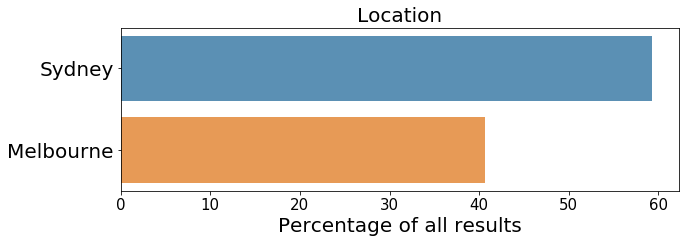

In [19]:
newyorkTimezone = df['Location'].value_counts(normalize=True).head()*100
plt.figure(figsize=(10, 3))
sns.barplot(y = newyorkTimezone.index, x = newyorkTimezone.values, alpha=0.8)
plt.title('Location', fontsize=20)
plt.ylabel('', fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of all results', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

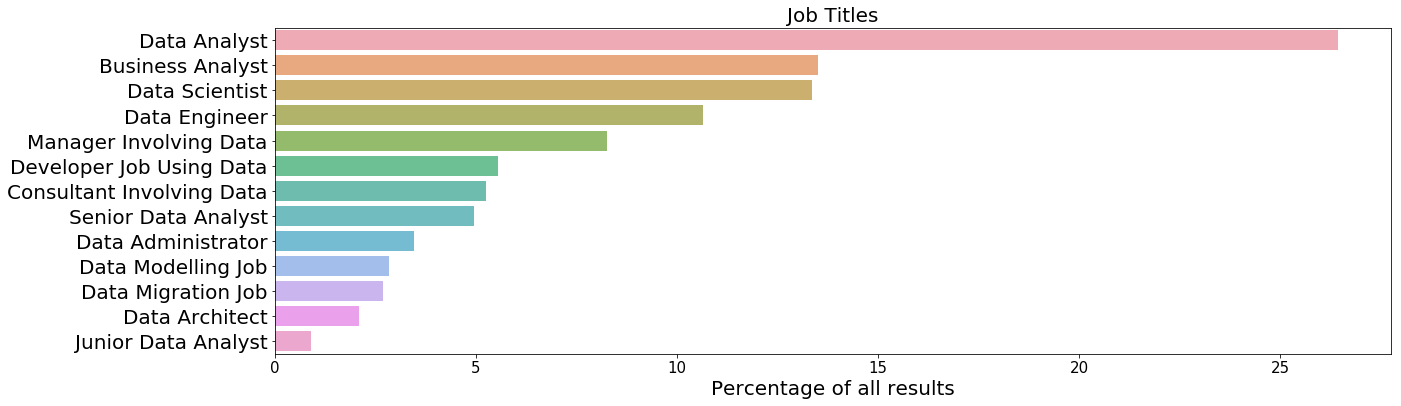

In [20]:
newyorkTimezone = df['Clean Job Title'].value_counts(normalize=True)*100
plt.figure(figsize=(20, 6))
sns.barplot(y = newyorkTimezone.index, x = newyorkTimezone.values, alpha=0.8)
plt.title('Job Titles', fontsize=20)
plt.ylabel('', fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of all results', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

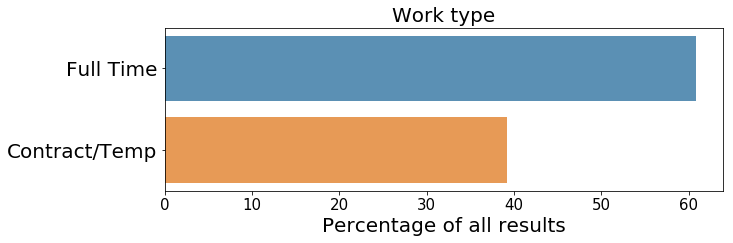

In [22]:
newyorkTimezone = df['Work type'].value_counts(normalize=True).head()*100
plt.figure(figsize=(10, 3))
sns.barplot(y = newyorkTimezone.index, x = newyorkTimezone.values, alpha=0.8)
plt.title('Work type', fontsize=20)
plt.ylabel('', fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of all results', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

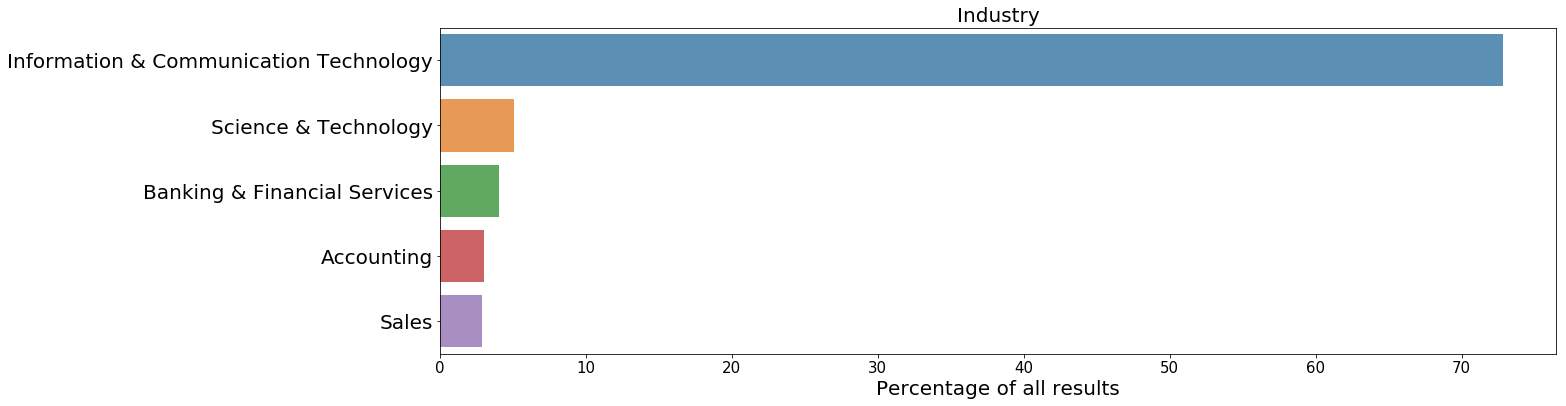

In [23]:
newyorkTimezone = df['Industry'].value_counts(normalize=True).head()*100
plt.figure(figsize=(20, 6))
sns.barplot(y = newyorkTimezone.index, x = newyorkTimezone.values, alpha=0.8)
plt.title('Industry', fontsize=20)
plt.ylabel('', fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of all results', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

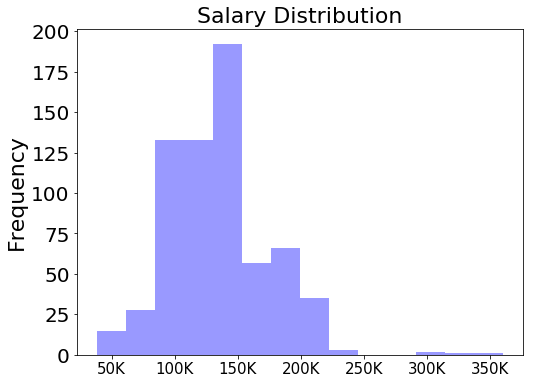

In [1014]:
#newyorkTimezone = df.groupby('Work type')['clean salary'].median()
plt.figure(figsize=(8, 6))
sns.distplot(df['clean salary'],kde=False,bins=14,color='b')
plt.title("Salary Distribution", fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xlabel('', fontsize=3)
plt.yticks(fontsize=20)
plt.xticks([50000, 100000, 150000, 200000, 250000, 300000, 350000],['50K', '100K', '150K', '200K', '250K', '300K', '350K'], fontsize=15)
plt.show()

## EDA: Multivariate

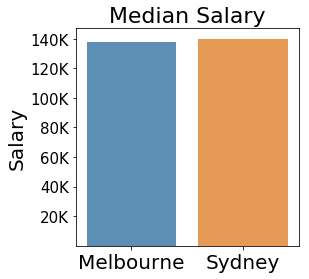

In [25]:
newyorkTimezone = df.groupby('Location')['clean salary'].median()
plt.figure(figsize=(4, 4))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title("Median Salary", fontsize=22)
plt.ylabel('Salary', fontsize=20)
plt.xlabel('', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks([20000, 40000, 60000, 80000, 100000, 120000, 140000],['20K', '40K', '60K', '80K', '100K', '120K', '140K'], fontsize=15)
plt.show()

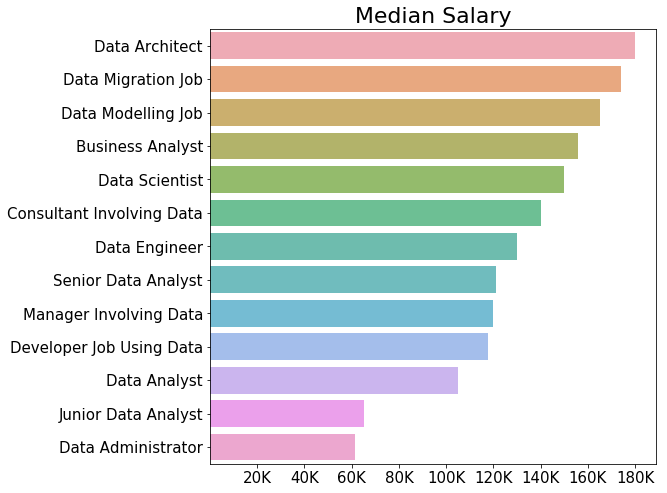

In [402]:
newyorkTimezone = df.groupby('Clean Job Title')['clean salary'].median().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(y=newyorkTimezone.index, x=newyorkTimezone.values, alpha=0.8)
plt.title("Median Salary", fontsize=22)
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks([20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000],['20K', '40K', '60K', '80K', '100K', '120K', '140K', '160K', '180K'], fontsize=15)
plt.show()

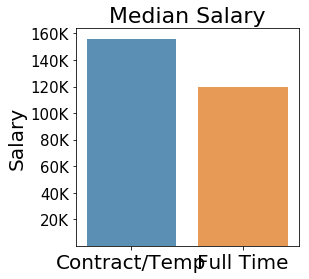

In [26]:
newyorkTimezone = df.groupby('Work type')['clean salary'].median()
plt.figure(figsize=(4, 4))
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title("Median Salary", fontsize=22)
plt.ylabel('Salary', fontsize=20)
plt.xlabel('', fontsize=3)
plt.xticks(fontsize=20)
plt.yticks([20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000],['20K', '40K', '60K', '80K', '100K', '120K', '140K', '160K'], fontsize=15)
plt.show()

## Preprocessing

### Imputing salaries

Based on what columns should we impute our salaries? 

Let's see how median salary changes for different groupby operations!

In [274]:
for column in ['Location', 'Clean Job Title', 'Work type', 'Industry']:
    print(df.groupby(column)['clean salary'].median().sort_values(ascending=False))
    print('-----------------------------------------')

Location
Melbourne    144000.0
Sydney       134871.0
Name: clean salary, dtype: float64
-----------------------------------------
Clean Job Title
Data Architect               180000.0
Business Analyst             170400.0
Data Migration Job           165000.0
Data Scientist               156000.0
Data Modelling Job           140400.0
Consultant Involving Data    140000.0
Data Analyst                 131000.0
Data Engineer                130000.0
Manager Involving Data       127371.0
Developer Job Using Data     125095.0
Senior Data Analyst          125000.0
Junior Data Analyst           67200.0
Data Administrator            57500.0
Name: clean salary, dtype: float64
-----------------------------------------
Work type
Contract/Temp      168000.0
Full Time          125000.0
Part Time           61440.0
Casual/Vacation         NaN
Name: clean salary, dtype: float64
-----------------------------------------
Industry
Hospitality & Tourism                     192000.0
Banking & Financial Serv

Conclusions:
- Median salary doesn't change much between Sydney and Melbourne, so let's NOT consider location for our imputations!
- Median salary varies significantly for different job titles, so let's consider it for our imputations!
- Median salary varies significantly for different work types, so let's consider it for out imputations!
- Industry exhibits high class imbalance, so let's NOT consider it for our imputations!

In [277]:
imputations = df.pivot_table(index='Clean Job Title',columns='Work type',aggfunc=np.median)
imputations.columns = imputations.columns.droplevel()
imputations.columns.name = None
imputations.sort_values(by = 'Full Time', ascending=False)

,Contract/Temp,Full Time
Clean Job Title,,
Data Architect,189000.0,180000.0
Data Scientist,174000.0,150000.0
Data Migration Job,174000.0,144000.0
Consultant Involving Data,183000.0,140000.0
Data Engineer,138000.0,130000.0
Senior Data Analyst,199200.0,121250.0
Manager Involving Data,216000.0,120000.0
Developer Job Using Data,144000.0,117647.5
Data Modelling Job,165000.0,107500.0


In [309]:
#let's make imputations based on the above pivot table:
for i in range(0, 666):
    if df.loc[i]['clean salary'] > 0:
        None
    else:
        job_title = df.iloc[i]['Clean Job Title']
        work_type = df.iloc[i]['Work type']
        df.loc[i,'clean salary'] = imputations.loc[job_title, work_type]

In [307]:
df2.reset_index(drop=True, inplace=True)

In [314]:
df.to_csv('cleanest_salary.csv')

In [11]:
df = pd.read_csv('cleanest_salary.csv').drop(columns = 'Unnamed: 0')

### Prepare predictor and target matrices

Create target: 'salary class'

In [471]:
#Let's divide the salaries into quintiles and create a multiclass classification problem!

print('0th percentile: ', df['clean salary'].quantile(0))
print('20th percentile: ', df['clean salary'].quantile(0.2))
print('40th percentile: ', df['clean salary'].quantile(0.4))
print('60th percentile: ', df['clean salary'].quantile(0.6))
print('80th percentile: ', df['clean salary'].quantile(0.8))
print('100th percentile: ', df['clean salary'].quantile(1))

0th percentile:  38400.0
20th percentile:  105000.0
40th percentile:  130000.0
60th percentile:  144000.0
80th percentile:  174000.0
100th percentile:  360000.0


In [1313]:
def salary_class(salary):
    if salary <= df['clean salary'].quantile(0.2):
        return 'Low'
    elif salary <= df['clean salary'].quantile(0.4):
        return 'Low/Medium'
    elif salary <= df['clean salary'].quantile(0.6):
        return 'Medium'
    elif salary <= df['clean salary'].quantile(0.8):
        return 'Medium/High'
    elif salary <= df['clean salary'].quantile(1):
        return 'High'

In [1314]:
df['salary class'] = df['clean salary'].apply(salary_class)
y = df['salary class']

Create predictor matrix

In [28]:
# dummify the columns of interest: Location, Work type, Clean Job Title and Industry
loc_dummies = pd.get_dummies(df['Location'], drop_first=True)
type_dummies = pd.get_dummies(df['Work type'], drop_first=True)
title_dummies = pd.get_dummies(df['Clean Job Title'], drop_first=True)
industry_dummies = pd.get_dummies(df['Industry'], drop_first=True)

X = pd.concat([loc_dummies, type_dummies, title_dummies, industry_dummies ], axis=1)

In [1341]:
# find columns with low variance!
low_var_columns = []
for column in list(X.columns):
    if np.max(X[column].value_counts(normalize=True)) > 0.99:
        low_var_columns.append(column)
low_var_columns

['Junior Data Analyst',
 'Advertising, Arts & Media',
 'Call Centre & Customer Service',
 'Construction',
 'Education & Training',
 'Engineering',
 'Government & Defence',
 'Healthcare & Medical',
 'Hospitality & Tourism',
 'Human Resources & Recruitment',
 'Insurance & Superannuation',
 'Manufacturing, Transport & Logistics',
 'Mining, Resources & Energy',
 'Real Estate & Property',
 'Retail & Consumer Products',
 'Trades & Services']

In [1342]:
# drop low variance columns from X
X.drop(columns = low_var_columns, inplace=True)

In [29]:
X.head()

,Sydney,Full Time,Consultant Involving Data,Data Administrator,Data Analyst,Data Architect,Data Engineer,Data Migration Job,Data Modelling Job,Data Scientist,...,Information & Communication Technology,Insurance & Superannuation,"Manufacturing, Transport & Logistics",Marketing & Communications,"Mining, Resources & Energy",Real Estate & Property,Retail & Consumer Products,Sales,Science & Technology,Trades & Services
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [1346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1347]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(532, 20)
(134, 20)
(532,)
(134,)


## Modelling

In [1345]:
np.round(y.value_counts(normalize=True)*100, 1)

Low            26.4
Medium         20.9
Low/Medium     20.0
High           16.4
Medium/High    16.4
Name: salary class, dtype: float64

The baseline accuracy 26.4%

Let's try the following 6 models: 
- KNN
- SVM
- Logistic Regression
- Naive Bayes
- Decision Tree
- Random Forest

In [1348]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors':list(range(1,100)),
    'weights':['distance','uniform']
}
knn_gs = GridSearchCV(knn, knn_params, cv=3)
knn_gs.fit(X_train, y_train)

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1349]:
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)
print(knn_gs.best_score_)

{'n_neighbors': 8, 'weights': 'distance'}
0.7857142857142857


In [1366]:
svc_params = {
    'C':np.logspace(-3, 2, 10),
    'gamma':np.logspace(-5, 2, 10),
    'kernel':['linear','rbf', 'poly', 'sigmoid']
}


svc_gs = GridSearchCV(SVC(), svc_params, cv=3, verbose=1)
svc_gs.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   20.7s finished
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-03, 3.59381e-03, 1.29155e-02, 4.64159e-02, 1.66810e-01,
       5.99484e-01, 2.15443e+00, 7.74264e+00, 2.78256e+01, 1.00000e+02]), 'gamma': array([1.00000e-05, 5.99484e-05, 3.59381e-04, 2.15443e-03, 1.29155e-02,
       7.74264e-02, 4.64159e-01, 2.78256e+00, 1.66810e+01, 1.00000e+02]), 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [1367]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 100.0, 'gamma': 0.0774263682681127, 'kernel': 'sigmoid'}
0.849624060150376


In [1353]:
lr =  LogisticRegression()

lr_params = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4, 2, 40),
    'solver':['liblinear']
}

lr_gs = GridSearchCV(lr, lr_params, cv=3, verbose=1)
lr_gs.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify t

/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 1.42510e-04, 2.03092e-04, 2.89427e-04, 4.12463e-04,
       5.87802e-04, 8.37678e-04, 1.19378e-03, 1.70125e-03, 2.42446e-03,
       3.45511e-03, 4.92388e-03, 7.01704e-03, 1.00000e-02, 1.42510e-02,
       2.03092e-02, 2.89427e-02, 4.12463e-...,
       2.42446e+01, 3.45511e+01, 4.92388e+01, 7.01704e+01, 1.00000e+02]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [1354]:
best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 17.012542798525892, 'penalty': 'l1', 'solver': 'liblinear'}
0.8327067669172933


In [1356]:
gnb = GaussianNB()
best_gnb = gnb.fit(X_train, y_train)
np.mean(cross_val_score(gnb, X_train, y_train, cv=3))

0.5286207640269756

In [1358]:
DTC = DecisionTreeClassifier()
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtc_gs = GridSearchCV(DTC, dtc_params, cv=3, verbose=1)
dtc_gs.fit(X_train, y_train)

Fitting 3 folds for each of 385 candidates, totalling 1155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1155 out of 1155 | elapsed:    6.3s finished
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [1359]:
dtc_best = dtc_gs.best_estimator_
print((dtc_gs.best_params_))
print((dtc_gs.best_score_))

{'max_depth': None, 'max_features': None, 'min_samples_split': 25}
0.849624060150376


In [1363]:
RFC =  RandomForestClassifier()

rfc_params = {
 'bootstrap': [True, False],
 'max_depth': [None, 1, 2, 3],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [25, 50, 100]
}

rfc_gs = GridSearchCV(RFC, rfc_params, cv=3, verbose=1)
rfc_gs.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1296 out of 1296 | elapsed:  1.6min finished
/Users/Tazman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True, False], 'max_depth': [None, 1, 2, 3], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [25, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [1364]:
rfc_best = dtc_gs.best_estimator_
print((rfc_gs.best_params_))
print((rfc_gs.best_score_))

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
0.849624060150376


## Evaluation of Models

In [96]:
evaluation = pd.DataFrame()
evaluation['Classifier'] = ['KNN', 'SVM', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest']
evaluation['Training Accuracy (using CV)'] = [round(knn_gs.best_score_, 3),
                                             round(svc_gs.best_score_, 3),
                                             round(lr_gs.best_score_, 3),
                                             round(np.mean(cross_val_score(gnb, X_train, y_train, cv=3)), 3),
                                             round(dtc_gs.best_score_, 3),
                                             round(rfc_gs.best_score_, 3)] 
evaluation['Testing Accuracy'] = [round(knn_best.score(X_test, y_test), 3),
                                             round(best_svc.score(X_test, y_test), 3),
                                             round(best_lr.score(X_test, y_test), 3),
                                             round(best_gnb.score(X_test, y_test), 3),
                                             round(dtc_best.score(X_test, y_test), 3),
                                             round(rfc_best.score(X_test, y_test), 3)] 
evaluation.sort_values(by='Testing Accuracy', ascending=False)

,Classifier,Training Accuracy (using CV),Testing Accuracy
1,SVM,0.850,0.813
2,Logistic Regression,0.833,0.806
4,Decision Tree,0.850,0.806
5,Random Forest,0.846,0.806
0,KNN,0.786,0.776
3,Naive Bayes,0.529,0.619


In [1400]:
evaluation = pd.DataFrame()
evaluation['Classifier'] = ['KNN', 'SVM', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest']
evaluation['Training Accuracy (using CV)'] = [round(knn_gs.best_score_, 3),
                                             round(svc_gs.best_score_, 3),
                                             round(lr_gs.best_score_, 3),
                                             round(np.mean(cross_val_score(gnb, X_train, y_train, cv=3)), 3),
                                             round(dtc_gs.best_score_, 3),
                                             round(rfc_gs.best_score_, 3)] 
evaluation['Testing Accuracy'] = [round(knn_best.score(X_test, y_test), 3),
                                             round(best_svc.score(X_test, y_test), 3),
                                             round(best_lr.score(X_test, y_test), 3),
                                             round(best_gnb.score(X_test, y_test), 3),
                                             round(dtc_best.score(X_test, y_test), 3),
                                             round(rfc_best.score(X_test, y_test), 3)] 
test = evaluation.sort_values(by='Testing Accuracy', ascending=False)

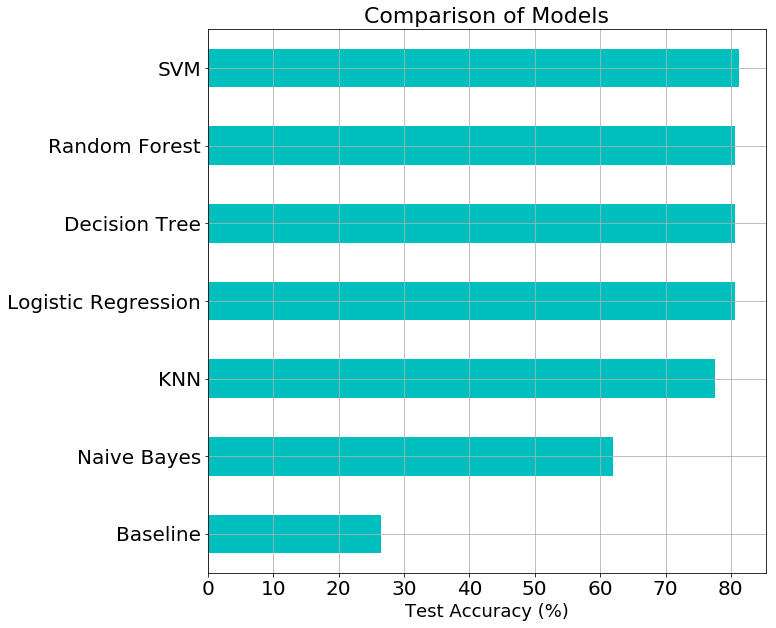

In [1431]:
ax = test.plot(kind='barh', legend=False,grid=True, figsize=(10,10),fontsize=20, color = 'c')
ax.set_title('Comparison of Models', fontsize=22)
ax.set_ylabel("", fontsize=18);
ax.set_xlabel("Test Accuracy (%)", fontsize=18);

In [1155]:
classes=['Low', 'Low/Medium', 'Medium', 'Medium/High', 'High']

# Note: I found the code for this function at:
# https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python

def plot_confusion_matrix(cm, classes=classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.tight_layout()

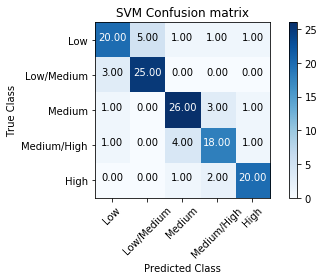

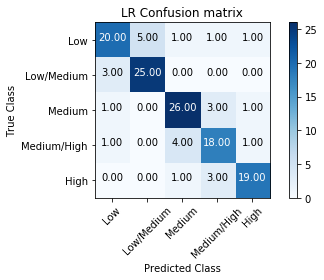

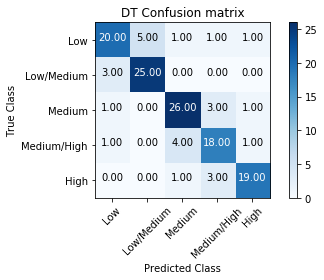

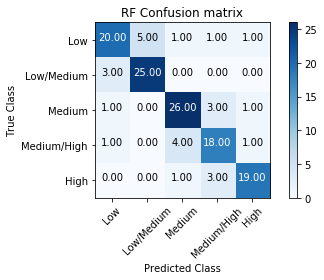

In [946]:
y_pred =  best_svc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred,labels=classes)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,title='SVM Confusion matrix')

y_pred =  best_lr.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred,labels=classes)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,title='LR Confusion matrix')

y_pred =  dtc_gs.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred,labels=classes)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,title='DT Confusion matrix')

y_pred =  rfc_best.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred,labels=classes)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,title='RF Confusion matrix')

LR, DT and RF perform exactly the same on the testing data.
SVM performs slightly better and is the best model so far.

# Predicting Job Category

In [32]:
df[['Clean Job Title', 'Description']].head()

,Clean Job Title,Description
0,Data Analyst,About Us Seventh Street Ventures is an entrepr...
1,Junior Data Analyst,Are you an up and coming Data/ Reporting Analy...
2,Data Analyst,"2 month role, working 4 or 5 days per week Kn..."
3,Junior Data Analyst,What’s your ambition? Is it a big goal or smal...
4,Data Analyst,NSW Government Client3 months contract with a ...


To predict job category, let's do NLP on the job description!

## EDA

In [868]:
custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.extend(['support', 'work', 'new', 'information', 'solution','data', 'Data', 'strong', 'skill',
                         'systems', 'apply', 'provide', 'project', 'performance', 'requirement' ,'organisation',
                         'including', 'environment', 'ability', 'need', 'role', 'skills', 'opportunity', 'source', 'product', 'requirements', 'required', 'key', 'large',
                           'application', 'company','global','use','knowledge','service','opportunities',
                           'people', 'develop', 'set', 'great', 'highly', 'based', 'solutions','ensure',
                           'looking', 'using', 'make', 'working', 'benefit', 'applications',
                           'industry', 'leading', 'seeking', 'analyst', 'analytical', 'tool', 'market',
                           'quality', 'create', 'benefits', 'area', 'needs', 'sources', 'world', 'level',
                           'processes', 'quality', 'offer', 'join', 'sets', 'maintain', 'complex',
                           'successful', 'day', 'services', 'complex', 'projects', 'build', 'assurance',
                           'candidate', 'background', 'position', 'responsible', 'process', 'contact',
                           'experienced','time', 'high', 'exciting', 'tools', 'demonstrated', 'proven',
                           'Australian','analytic', 'analytics', 'closely','job', 'advanced', 'range',
                           'professional', 'implement', 'require', 'integrity', 'ensuring','customer',
                           'Australia','predictive','innovative', 'design', 'year','platform',
                           'building', 'responsibilities','deliver', 'capability','techniques', 'excellent',
                           'expertise', 'products', 'value', 'software','platform','technologies',
                           'analyse','understanding','technical','help', 'lead', 'Scientist', 'recommendations',
                           'include', 'delivering', 'years', 'Melbourne', 'best', 'like', 'relevant',
                           'science', 'BrightStar', 'capabilities', 'functional', 'passionate', 'making',
                           'love', 'field', 'able', 'focused', 'assist', 'scientists', 'decision'])

In [1112]:
def wordcloud(title):
    descriptions = ''
    for i in list(df[df['Title'] == title]['Description'].index):
        descriptions += df['Description'][i]
    wordcloud = WordCloud(stopwords = custom_stop_words_2, max_font_size=50, max_words=10, background_color="white").generate(descriptions)
    plt.figure(figsize=(15, 6))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

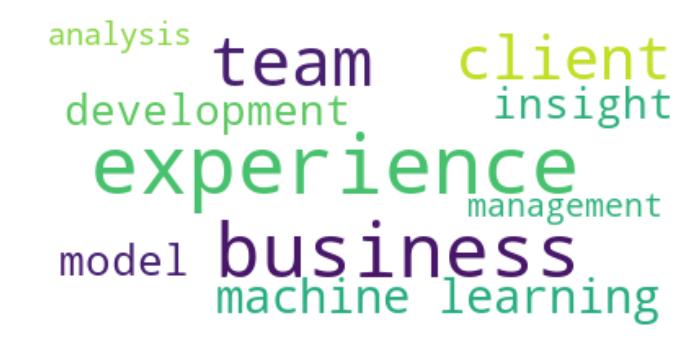

In [1117]:
wordcloud('Data Scientist')

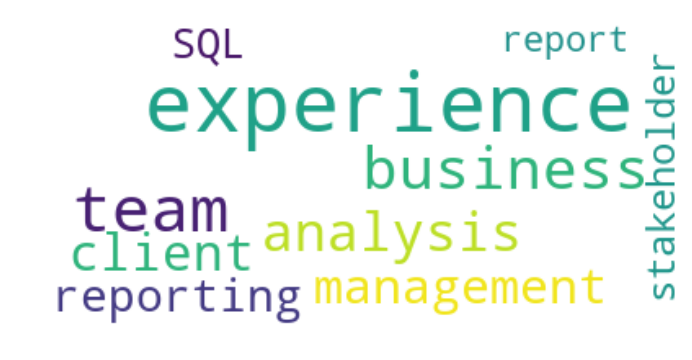

In [1114]:
wordcloud('Data Analyst')

Comparing 'Data Analyst' and 'Data Scientist' job descriptions:

Similarities:
- emphasis on business, experience, team, analysis and the client



Differences:
- 'scientist' jobs place a stronger emphasis on experience
- 'scientist' jobs place a stronger emphasis on Python, while 'analyst' jobs place a stronger emphasis on SQL
- 'scientst' jobs place emphasis on modelling and machine learning
- 'analyst' jobs place a stronger emphasis on reporting

## Preprocessing

In [52]:
# read csv
df = pd.read_csv('scraped_ads_cleanest.csv')[['Description', 'Clean Job Title']]

In [53]:
# let's just focus on Data Scientists and Data Analysts
df2 = df[(df['Clean Job Title'] == 'Data Analyst') | (df['Clean Job Title'] == 'Data Scientist') |
   (df['Clean Job Title'] == 'Junior Data Analyst') | (df['Clean Job Title'] == 'Senior Data Analyst')]

In [54]:
# Create the predictor and target matrices
X = df2['Description']
y = np.where(df2['Clean Job Title'] == 'Data Scientist', 1, 0)

In [55]:
# reupdate stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.extend(['data', 'scientist', 'science', 'projects','processes',
                         'credit', 'key', 'scientists','organisation',
                         'receive','sydney','analytics','energyaustralia','dxc','image',
                         'asset', 'drive','assets','analyst','behaviours','values',
                         'extremely','looking','large','customer','foxtel','understanding',
                     'analysis', 'learning', 'techniques', 'role', 'contact','risk',
                         'predictive', 'statistical','models','iot','algorithms','quality',
                         'university','revenue', 'making','love','fraud','entertainment','migration',
                         'advice','governance','sourcing','rv','issues','tools','need',
                         'using','decision','acumen','sets','commercial','master','government',
                         'health','significant','experience','right','solutions','ml','real','internet',
                         'recommendation', 'amounts','cutting','engineering','scoring','major',
                         'mathematics','edge','analysing','management','trading','tech','service',
                         'huge','building','platform','leading','package','report','academic','reports',
                         'overall','largest','accountabilities', 'capacity', 'define'])

# Initialise TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 2, ngram_range = (1, 1), stop_words = custom_stop_words)

# use TfidfVectorizer to create a document-term matrix from X
X_m = tfidf.fit_transform(X)

# convert the matrix into a dataframe
X_df = pd.DataFrame(X_m.todense(), columns=tfidf.get_feature_names())

In [56]:


# Create the train test splits
X_train, X_test, y_train, y_test = train_test_split(X_df, 
                     y, test_size=0.2, random_state=42)

In [59]:
# Inspect shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(243, 3371)
(61, 3371)
(243,)
(61,)


## Modelling

### Fitting the models

In [64]:
max(y.mean(), 1 - y.mean())

0.7072368421052632

Baseline: 71%

Let's try two models - Logistic Regression and Decision Tree Classifier

In [70]:
lr =  LogisticRegression()

lr_params = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4, 2, 40),
    'solver':['liblinear']
}

lr_gs = GridSearchCV(lr, lr_params, cv=3, verbose=1)
lr_gs.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    4.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 1.42510e-04, 2.03092e-04, 2.89427e-04, 4.12463e-04,
       5.87802e-04, 8.37678e-04, 1.19378e-03, 1.70125e-03, 2.42446e-03,
       3.45511e-03, 4.92388e-03, 7.01704e-03, 1.00000e-02, 1.42510e-02,
       2.03092e-02, 2.89427e-02, 4.12463e-...,
       2.42446e+01, 3.45511e+01, 4.92388e+01, 7.01704e+01, 1.00000e+02]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [72]:
best_lr = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)
print(lr_gs.score(X_test, y_test))

{'C': 8.376776400682925, 'penalty': 'l2', 'solver': 'liblinear'}
0.8477366255144033
0.8360655737704918


In [65]:
DTC = DecisionTreeClassifier()
dtc_params = {
    'max_depth':[None,1,2,3,4, 5],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[11, 12, 13, 14,15,16, 17, 18, 19, 20]
}

dtc_gs = GridSearchCV(DTC, dtc_params, cv=3, verbose=1)
dtc_gs.fit(X_train, y_train)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed:   19.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [None, 1, 2, 3, 4, 5], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [66]:
dtc_best = dtc_gs.best_estimator_
print((dtc_gs.best_params_))
print((dtc_gs.best_score_))
print(dtc_gs.score(X_test, y_test))

{'max_depth': 2, 'max_features': None, 'min_samples_split': 13}
0.9218106995884774
0.8524590163934426


### Feature Importance

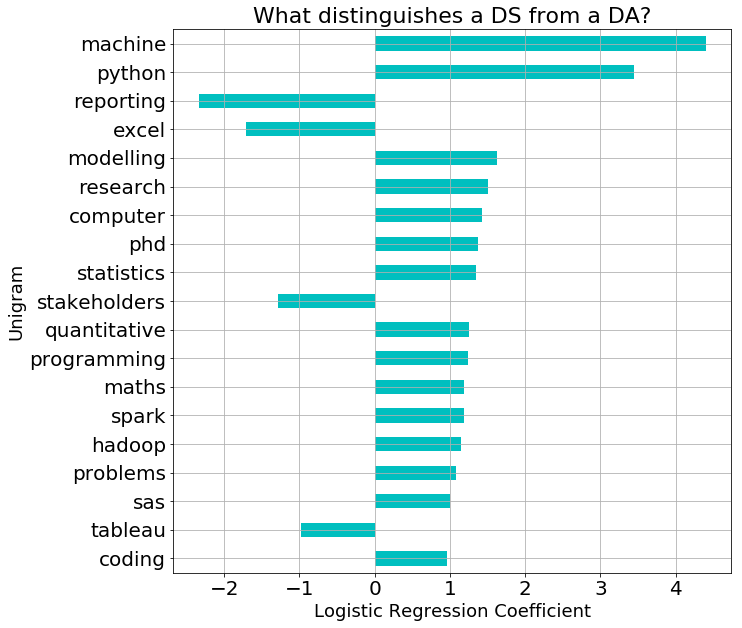

In [749]:
ax = helper.sort_values(by='absolute value', ascending=False).head(19)[::-1].plot(x='feature', y='coefficient',
                                                                      kind='barh', legend=False,
                                                                      grid=True, figsize=(10,10),
                                                                            fontsize=20, color = 'c')
ax.set_title('What distinguishes a DS from a DA?', fontsize=22)
ax.set_ylabel("Unigram", fontsize=18);
ax.set_xlabel("Logistic Regression Coefficient", fontsize=18);

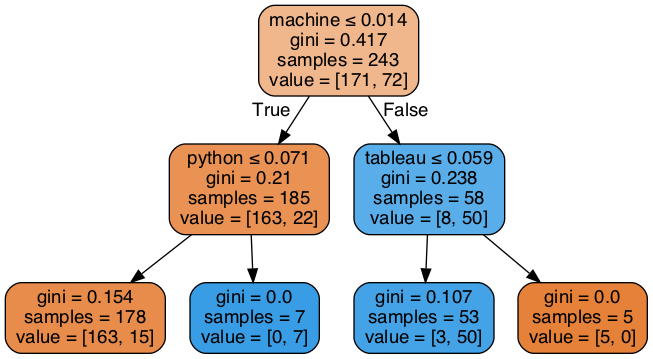

In [76]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# # initialize the output file object
dot_data = StringIO() 

# # my fit DecisionTreeRegressor object here is: dtr1
# # for feature_names i put the columns of my Xr matrix
export_graphviz(dtc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                 feature_names=X_train.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [902]:
fi = pd.DataFrame({
        'feature':X_train_df.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi.head(3)

,feature,importance
1604,machine,0.715131
2126,python,0.165623
2627,tableau,0.119246


In [83]:
def print_cm_cr(y_test, y_pred):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print(confusion)
    print()
    print(classification_report(y_test, y_pred))
    

According to both the LR model and the DTC, the two best predictors of data science are 'Machine Learning' and 'Python

### Evaluation of models

In [85]:
y_pred = best_lr.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted   0  1  All
Actual               
0          43  1   44
1           9  8   17
All        52  9   61

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        44
           1       0.89      0.47      0.62        17

   micro avg       0.84      0.84      0.84        61
   macro avg       0.86      0.72      0.76        61
weighted avg       0.84      0.84      0.82        61



In [86]:
y_pred = dtc_best.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted   0   1  All
Actual                
0          42   2   44
1           7  10   17
All        49  12   61

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        44
           1       0.83      0.59      0.69        17

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.77      0.80        61
weighted avg       0.85      0.85      0.84        61



Here, the deicison tree classifier performs better than logistic regression. This example really showcases the beautfy of DTC - it's much simpler AND more accurate here!

# Conclusion

In [ ]:
df_odds['P1 Av odds check'] = np.where(df_odds['Target'] == 1, df_odds['AvgW'], df_odds['AvgL'] )
df_odds['P2 Av odds check'] = np.where(df_odds['Target'] == 0, df_odds['AvgW'], df_odds['AvgL'] )

df_odds['P1 B&W odds'] = np.where(df_odds['Target'] == 1, df_odds['B&WW'], df_odds['B&WL'] )
df_odds['P2 B&W odds'] = np.where(df_odds['Target'] == 0, df_odds['B&WW'], df_odds['B&WL'] )

df_odds['P1 B365 odds'] = np.where(df_odds['Target'] == 1, df_odds['B365W'], df_odds['B365L'] )
df_odds['P2 B365 odds'] = np.where(df_odds['Target'] == 0, df_odds['B365W'], df_odds['B365L'] )

df_odds['P1 CB odds'] = np.where(df_odds['Target'] == 1, df_odds['CBW'], df_odds['CBL'] )
df_odds['P2 CB odds'] = np.where(df_odds['Target'] == 0, df_odds['CBW'], df_odds['CBL'] )

df_odds['P1 EX odds'] = np.where(df_odds['Target'] == 1, df_odds['EXW'], df_odds['EXL'] )
df_odds['P2 EX odds'] = np.where(df_odds['Target'] == 0, df_odds['EXW'], df_odds['EXL'] )

df_odds['P1 GB odds'] = np.where(df_odds['Target'] == 1, df_odds['GBW'], df_odds['GBL'] )
df_odds['P2 GB odds'] = np.where(df_odds['Target'] == 0, df_odds['GBW'], df_odds['GBL'] )

df_odds['P1 IW odds'] = np.where(df_odds['Target'] == 1, df_odds['IWW'], df_odds['IWL'] )
df_odds['P2 IW odds'] = np.where(df_odds['Target'] == 0, df_odds['IWW'], df_odds['IWL'] )

df_odds['P1 LB odds'] = np.where(df_odds['Target'] == 1, df_odds['LBW'], df_odds['LBL'] )
df_odds['P2 LB odds'] = np.where(df_odds['Target'] == 0, df_odds['LBW'], df_odds['LBL'] )

df_odds['P1 PS odds'] = np.where(df_odds['Target'] == 1, df_odds['PSW'], df_odds['PSL'] )
df_odds['P2 PS odds'] = np.where(df_odds['Target'] == 0, df_odds['PSW'], df_odds['PSL'] )

df_odds['P1 SB odds'] = np.where(df_odds['Target'] == 1, df_odds['SBW'], df_odds['SBL'] )
df_odds['P2 SB odds'] = np.where(df_odds['Target'] == 0, df_odds['SBW'], df_odds['SBL'] )

df_odds['P1 SJ odds'] = np.where(df_odds['Target'] == 1, df_odds['SJW'], df_odds['SJL'] )
df_odds['P2 SJ odds'] = np.where(df_odds['Target'] == 0, df_odds['SJW'], df_odds['SJL'] )

df_odds['P1 UB odds'] = np.where(df_odds['Target'] == 1, df_odds['UBW'], df_odds['UBL'] )
df_odds['P2 UB odds'] = np.where(df_odds['Target'] == 0, df_odds['UBW'], df_odds['UBL'] )